# Match Report Template

In [1]:
import main
import main_ver03 as main03
import os

import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
from imageio import imread
from skimage.transform import resize
import math
from math import pi
import scipy.stats
from selenium import webdriver
import warnings

import matplotlib as mpl
from matplotlib import colors
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.collections import LineCollection
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib.image as mpimg
import matplotlib.image as image
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib.projections import get_projection_class
import matplotlib.cm as cm


from mplsoccer import Pitch, add_image, VerticalPitch, FontManager
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    
warnings.filterwarnings('ignore')


teamName = 'fiorentina'
season = input(str("season:"))
gw = input(str('period:'))

import pickle
# ## Write
# with open(file=f"/work/assets/whoscored/{teamName}/match/{season}/matchData/#{gw}.json",mode="wb") as file:
#     pickle.dump(match_data,file)

# Read
with open(file=f"/work/assets/whoscored/{teamName}/match/{season}/matchData/#{gw}.json", mode="rb") as file:
    match_data = pickle.load(file)


matchId = match_data['matchId']
homeId = match_data['home']['teamId']
homeFormation = match_data['home']['formations'][0]['formationName']

awayId = match_data['away']['teamId']
awayFormation = match_data['away']['formations'][0]['formationName']

matches_df = main03.createMatchesDF(match_data)

homeName = matches_df['home'][matchId]['name']
homeScore = matches_df['home'][matchId]['scores']['fulltime']
homeAge = matches_df['home'][matchId]['averageAge']

awayName = matches_df['away'][matchId]['name']
awayScore = matches_df['away'][matchId]['scores']['fulltime']
awayAge = matches_df['away'][matchId]['averageAge']


events_df = main03.createEventsDF(match_data)
events_df = main03.addEpvToDataFrame(events_df)

team_players_dict = {}
player_ratings = {}
for venue in ['home','away']:
    team_players_dict[venue] = {}
    for player in matches_df[venue][matchId]['players']:
        team_players_dict[venue][(player['playerId'],player["name"])] = player['position']
        try:
            player_ratings[player['name']] = player['stats']['ratings']
        except KeyError:
            pass


season: 2122
period: 29


In [2]:
#Loading Some Fonts
smooch = "https://github.com/googlefonts/smooch/blob/master/fonts/ttf/Smooch-Regular.ttf?raw=true"
spaceMono_italy = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-Italic.ttf?raw=true'
spaceMono_bold = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-BoldItalic.ttf?raw=true'
spaceMono_dance = "https://github.com/googlefonts/moondance/tree/master/fonts/ttf?raw=true"
robot_bold = ("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true")
abel_regular = 'https://github.com/google/fonts/blob/main/ofl/abel/Abel-Regular.ttf?raw=true'

# smoochFont = FontManager(smooch)
monoIFont = FontManager(spaceMono_italy)
monoBFont = FontManager(spaceMono_bold)
monoDFont = FontManager(spaceMono_dance)
# robot_bold = FontManager(robot_bold)
# abel_regular = FontManager(abel_regular)

pitch_color = '#131313'
text_color = '#ffffff'
oneColor = '#B94B5F'
theOtherColor = '#4A5EB8'

cmap_color1 = oneColor
cmap_color2 = theOtherColor

cmapA = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color1], N=100)
cmapB = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color2], N=100)
myFont = monoIFont

from urllib.request import urlopen
from PIL import Image
URL = "https://upload.wikimedia.org/wikipedia/en/thumb/4/47/FC_Barcelona_%28crest%29.svg/1200px-FC_Barcelona_%28crest%29.svg.png"
mark = Image.open(urlopen(URL))
# URL2 = "https://upload.wikimedia.org/wikipedia/en/thumb/c/ce/Valenciacf.svg/1200px-Valenciacf.svg.png"
URL2 = "https://upload.wikimedia.org/wikipedia/en/thumb/9/98/Club_Athletic_Bilbao_logo.svg/1200px-Club_Athletic_Bilbao_logo.svg.png"
mark2 = Image.open(urlopen(URL2))

In [3]:
teamId = homeId if homeId == 65 else awayId
opponentId = homeId if awayId == 65 else awayId
opponentName = homeName if awayName == teamName else awayName

In [4]:
events_df = events_df.dropna(subset=["endX"])
events_df["playerId"] = events_df["playerId"].astype(int)

In [5]:
# axes[0].text(s="1).Bayern makes strong connections in the both side.\n    I think Upamecano was key to these connections.\n",
#              x=7,y=92,color="white",fontsize=15)

# axes[1].text(s="1).Barca have ball in the right side.\n             Because Bayern denied access to left side.\n\
# 2).If Barca could have switch to left side, \n             Dembele might get goal With a probability of 1%.....",
#              x=7,y=95,color="white",fontsize=15)
# fig.patches.extend([
#     plt.Rectangle(
#         (.16,.320),.125,.222,fill=False, alpha=1,
#         linestyle="-.", edgecolor=homeColor, linewidth=1.5, zorder=99,
#         transform=fig.transFigure, figure=fig)
# ])
# fig.patches.extend([
#     plt.Rectangle(
#         (.32,.380),.125,.222,fill=False, alpha=1,
#         linestyle="-.", edgecolor=homeColor, linewidth=1.5, zorder=99,
#         transform=fig.transFigure, figure=fig)
# ])

# fig.patches.extend([
#     plt.Rectangle(
#         (.772,.570),.105,.112,fill=False, alpha=1,
#         linestyle="-.", edgecolor="dodgerblue", linewidth=1.5, zorder=99,
#         transform=fig.transFigure, figure=fig)
# ])

# fig.patches.extend([
#     plt.Rectangle(
#         (.542,.570),.105,.112,fill=False, alpha=1,
#         linestyle="-.", edgecolor="dodgerblue", linewidth=1.5, zorder=99,
#         transform=fig.transFigure, figure=fig)
# ])


# fig.patches.extend([
#     plt.Rectangle(
#         (.6,.54),.25,.103,fill=False,alpha=1,
#         linestyle="-.",edgecolor="dodgerblue",linewidth=1.5,zorder=99,
#         transform=fig.transFigure,figure=fig)
# ])
# fig.patches.extend([
#     plt.Rectangle(
#         (.64,.49),.15,.106,fill=False,alpha=1,
#         linestyle="-.",edgecolor="dodgerblue",linewidth=1.5,zorder=99,
#         transform=fig.transFigure,figure=fig)
# ])

In [6]:
xT = pd.read_csv("/work/assets/xT_Grid.csv",header=None)
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

df = events_df
# df = df[df["teamId"]==65]
df = df.dropna(subset=["endX"])
df["x_bin"] = pd.cut(x=df["x"],bins=xT_cols,labels=False)
df["y_bin"] = pd.cut(x=df["y"],bins=xT_rows,labels=False)
df["endX_bin"] = pd.cut(x=df["endX"],bins=xT_cols,labels=False)
df["endY_bin"] = pd.cut(x=df["endY"],bins=xT_rows,labels=False)
df["start_zone_value"] = df[["x_bin","y_bin"]].apply(lambda x: xT[x[1]][x[0]], axis=1)
df["end_zone_value"] = df[["endX_bin","endY_bin"]].apply(lambda x: xT[x[1]][x[0]], axis=1)
df["xT"] = df['end_zone_value'] - df['start_zone_value']

xTBar = df.groupby(by=["playerId"])["xT"].sum()
playersHome = []
xTHome = []
playersAway = []
xTAway = []
for pid in xTBar.index:
    for i in team_players_dict["home"].keys():
        if pid in i:
            playersHome.append(i[1])
            xTHome.append(xTBar.loc[i[0]])            
            
for pid in xTBar.index:
    for i in team_players_dict["away"].keys():
        if pid in i:
            playersAway.append(i[1])
            xTAway.append(xTBar.loc[i[0]])

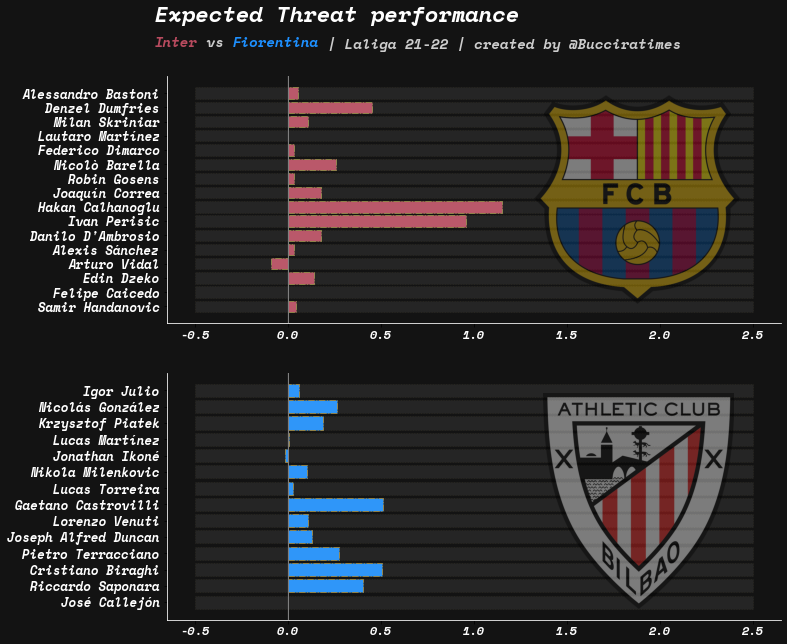

In [7]:
homeColor = '#B94B5F'
awayColor = 'dodgerblue'

from highlight_text import fig_text

fig,axes = plt.subplots(2,1,figsize=(11,10))
fig.set_facecolor("#131313")

def plotXTGraph(xT,ax,players,color):
    x = np.arange(len(xT))
    y = xT

    ax.set_facecolor("#131313")
    ax.spines["left"].set_visible(True)
    ax.spines["left"].set_color("#ffffff")
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.spines["bottom"].set_color("#ffffff")
    
    ax.barh(x, y, align="center", color=color, ls="-.", edgecolor="#8C7E43") 
    ax.barh(x, 2.5, align="center", color="#cccccc", ls=":", edgecolor="#8C7E43",alpha=.1)
    ax.barh(x, -.5, align="center", color="#cccccc", ls=":", edgecolor="#8C7E43",alpha=.1)
    ax.axvline(x=0,linewidth=1,linestyle="-",color="gray")
    ax.set_xticks([-.5,0,0.5,1,1.5,2,2.5])
    ax.set_xticklabels(np.linspace(-.5,2.5,7),color="white",fontproperties=monoBFont.prop, fontsize=12, fontweight="heavy")
    ax.set_yticks(x)
    ax.set_yticklabels(players,fontproperties=monoBFont.prop, fontsize=12.5, color="white",fontweight="semibold")
    ax.axvline(x=0, ymin=0, ymax=1,color="gray",lw=.2)

plotXTGraph(xTHome,axes[0],playersHome,homeColor)
plotXTGraph(xTAway,axes[1],playersAway,awayColor)

fig_text(s=f"Expected Threat performance",
         x=.11,y=.95,
         color="#ffffff",
#          highlight_colors=[homeColor,"dodgerblue"],
#          highlight_weights=['regular',"regular"],
         fontsize=22,
         font_properties=monoBFont.prop,fig=fig)

fig_text(s=f"<{homeName}> vs <{awayName}> | Laliga 21-22 | created by @Bucciratimes",
         x=.11,y=.917,
         color="#cccccc",
         highlight_colors=[homeColor,"dodgerblue"],
         highlight_weights=['regular',"regular"],
         fontsize=14,
         font_properties=monoBFont.prop,fig=fig)

ax_image = add_image(mark, fig, left=axes[0].get_position().x1-.33, bottom=axes[0].get_position().y1-.32, width=0.3, height=0.3, alpha=.4) 
ax_image2 = add_image(mark2, fig, left=axes[0].get_position().x1-.33, bottom=axes[0].get_position().y1-.74, width=0.3, height=0.3, alpha=.4)
# plt.savefig('/work/output/xt.png', dpi=200, bbox_inches="tight",facecolor='#131313')

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(21,18))
pitchColor="#ededed"
pitchColor="#131313" #black
pitchLineColor = '#495E62'
pitchLineColor = '#ededed' #black
textColor = "#efefef"
# discribeColor = "#6D6065"
discribeColor = "#ededed" #black
# playerNameColor = "#1A1F21"
playerNameColor = "#efefef" #_black
# lineColor = '#3D3337'
lineColor = '#ededed' #black

fig.set_facecolor(pitchColor)
pitch = VerticalPitch(
    pitch_type='statsbomb',
    goal_type = 'box',
    pitch_color = pitchColor,
    line_color = pitchLineColor, 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5
)
pitch.draw(ax=axes[0])
pitch.draw(ax=axes[1])


def pass_line_template(ax, x, y, end_x, end_y, line_color, width):
    ax.annotate('', xy=(80-.8*end_y, 1.2*end_x), xytext=(80-.8*y, 1.2*x), zorder=1,
    arrowprops=dict(arrowstyle='<|-|>', linewidth=width, color=line_color, alpha=.88))
    
def pass_line_template_shrink(ax, idx, x, y, end_x, end_y, line_color, dist_delta=1.2):
    dist = math.hypot(end_x - x, end_y - y)
    angle = math.atan2(end_y-y, end_x-x)
    upd_x = x + (dist - dist_delta) * math.cos(angle)
    upd_y = y + (dist - dist_delta) * math.sin(angle)
    width = passes_between['width'][idx]*.4
    pass_line_template(ax, x, y, upd_x, upd_y, line_color=line_color, width=width)
    
    
x = 'x_median'
end_x = 'x_median_end'
y = 'y_median'
end_y = 'y_median_end'

def plot_passnet(axNum,color):
    pitch.scatter(
        average_locs_and_count['x_median'] /
        100 * 120,
        80 - average_locs_and_count['y_median'] / 100 * 80,
        s=average_locs_and_count['marker_size']*2.5, 
    #     hatch='|'*2,
        alpha=0.8,
        facecolor=color,
        edgecolor='#E3B409',
        linewidth=3,
        ax=axes[axNum],
    )

    for index, row in average_locs_and_count.iterrows():
        pitch.annotate(row['passRecipientName'],
                       xy=(row['x_median'] / 100 * 120, 80-row['y_median'] / 100 * 80),
                       c=playerNameColor,
                       va='baseline',
                       ha='center',
                       size=14,
                       alpha=.8,
                       weight=750,
                       fontname='serif',
                       ax=axes[axNum],
                      )

    for idx, row in passes_between.iterrows():
        pass_line_template_shrink(
            axes[axNum],idx,
            row['x_median'],row['y_median'],
            row['x_median_end'],row['y_median_end'],
            lineColor)


    pitch.annotate(
        "These Positions are Median Location of Successful Passes.\nArrows -> Pass Work Until First Substitution\nNode's Size -> Counts of Passes",
        (110, 40),
        color=discribeColor,
        fontsize=14, ha='center', va='center', fontname='serif',
        ax=axes[axNum], fontweight='bold')
    

    
net_dict = {'home':homeId,'away':awayId}
idx = 0
for VENUE,teamId in net_dict.items():
    team_players_dict = {}
    for player in matches_df[VENUE][matchId]['players']:
        team_players_dict[player['playerId']] = player['name']
    

#     match_events_df = events_df[events_df['matchId']==matchId].reset_index(drop=True)
    match_events_df = events_df.reset_index(drop=True)
    passes_df = match_events_df.loc[[
            row['displayName']=='Pass' for row in list(match_events_df['type'])
    ]].reset_index(drop=True)

    # passes_df45 = passes_df[(passes_df['minute']>30)&(passes_df['minute']<30)]
    # passes_df = passes_df45

    passes_df = passes_df[passes_df['teamId']==teamId].reset_index().drop('index', axis=1)
    passes_df = passes_df.loc[[
        row['displayName']=='Successful' for row in list(
            passes_df['outcomeType']
        )]].reset_index(drop=True)


    passes_df['playerName'] = [team_players_dict[i] for i in list(passes_df['playerId'])]
    passes_df['passRecipientId'] = passes_df['playerId'].shift(-1)
    passes_df['passRecipientName'] = passes_df['playerName'].shift(-1)
    passes_df.dropna(subset=['passRecipientName'],inplace=True)


    match_player_df = pd.DataFrame()
    player_names = []
    player_ids = []
    player_pos = []
    player_kit_number = []

    for player in matches_df[VENUE][matchId]['players']:
        player_names.append(player['name'])
        player_ids.append(player['playerId'])
        player_pos.append(player['position'])
        player_kit_number.append(player['shirtNo'])

    match_player_df['playerId'] = player_ids
    match_player_df['playerName']=player_names
    match_player_df['playerPos']=player_pos
    match_player_df['playerKitNumber']=player_kit_number


    passes_df = passes_df.merge(
        match_player_df,
        on=['playerId', 'playerName'],
        how='left',
        validate='m:1'
    )
    match_player_df.rename(columns={
          'playerId': 'passRecipientId', 'playerName': 'passRecipientName'  
        },inplace=True)
    passes_df = passes_df.merge(
        match_player_df,
        on=['passRecipientId', 'passRecipientName'],
        how='left',
        validate='m:1',
        suffixes=['', '_Receipt']
    )
    # passes_df.drop(['playerPos_x','playerKitNumber_x','playerPos_y','playerKitNumber_y'],inplace=True,axis=1)

    passes_df = passes_df[(passes_df['playerPos'] != 'Sub')]

    # passes_df = passes_df[(passes_df['playerPos'] != 'Sub')|(passes_df['playerKitNumber']==27)|(passes_df['playerKitNumber']==9)]
    # passes_df = passes_df[passes_df['playerKitNumber']!=16]


    passes_formation = passes_df[[
            'id', 'playerKitNumber', 'playerKitNumber_Receipt']].copy()

    location_formation = passes_df[['playerKitNumber', 'x', 'y']].copy()

    # average_locs_and_count = location_formation.groupby('playerKitNumber').agg(
    #     {'x':['mean', 'median'], 'y':['mean', 'median', 'count']}
    # )
    location_formation

    average_locs_and_count = location_formation.groupby(by='playerKitNumber').agg(
        {'x':['mean','median'], 'y':['mean','median','count']}
    )
    average_locs_and_count.columns = ['x_mean', 'x_median', 'y_mean', 'y_median', 'count']


    passes_formation['kitNo_max'] = passes_formation[[
        'playerKitNumber', 'playerKitNumber_Receipt'
    ]].max(axis='columns')

    passes_formation['kitNo_min'] = passes_formation[[
            'playerKitNumber', 'playerKitNumber_Receipt'
    ]].min(axis='columns')


    passes_between = passes_formation.groupby(
        ['kitNo_max', 'kitNo_min']
    )['id'].count().reset_index()

    passes_between.rename(columns={'id': 'pass_count'},inplace=True)

    passes_between = passes_between.merge(
        average_locs_and_count,
        left_on='kitNo_min',
        right_index=True
    )

    passes_between = passes_between.merge(
        average_locs_and_count,
        left_on='kitNo_max',
        right_index=True,
        suffixes=['','_end']
    )


    MAXLINEWIDTH = 10
    MAXMARKERSIZE = 1000
    COLORCODE = '#87CEEB'
    MINTRANSPARENCY = 0.3

    passes_between['width'] = passes_between['pass_count'] / \
        passes_between['pass_count'].max() * MAXLINEWIDTH

    passes_between = passes_between.loc[(passes_between['pass_count']>5)]

    average_locs_and_count['marker_size'] = (
        average_locs_and_count['count'] / average_locs_and_count['count'].max() * MAXMARKERSIZE
    )


    color = np.array(to_rgba(COLORCODE))
    color = np.tile(color, (len(passes_between), 1))
    c_transparency = passes_between['pass_count'] / passes_between['pass_count'].max()
    c_transparency = (c_transparency * (1 - MINTRANSPARENCY)) + MINTRANSPARENCY
    color[:,3] = c_transparency
    passes_between['alpha'] = color.tolist()



    passes_between.reset_index(drop=True,inplace=True)

    average_locs_and_count['name'] = average_locs_and_count.index
    average_locs_and_count = average_locs_and_count.merge(match_player_df,on=['playerKitNumber'])
    
    if idx == 0:   
        plot_passnet(0,"#B94B5F")
        axes[idx].text(x=13, y=130, s=f'{homeName}-Network (Avg.Age {homeAge})',fontsize=22,color=textColor,fontname="serif")
        idx += 1
    elif idx == 1:
        axes[idx].text(x=17, y=130, s=f'{awayName}-Network (Avg.Age {awayAge})',fontsize=22,color=textColor,fontname="serif")
        plot_passnet(1,"#4A5EB8")

# average_locs_and_count
# match_player_df
# team_players_dict
# average_locs_and_count.rename(columns={'name':'number','passRecipientId':'playerId','passRecipientName':'playerName'})


axes[0].text(x=30,y=92,s=f'{homeScore}',color='red', fontsize=200, alpha=.33)
axes[1].text(x=30,y=92,s=f'{awayScore}',color='blue', fontsize=200, alpha=.33)


axes[0].text(x=35,y=124,s=f'{homeFormation}',color=textColor, fontsize=28, fontname="serif")
axes[1].text(x=36,y=124,s=f'{awayFormation}',color=textColor, fontsize=28, fontname="serif")


axes[0].text(x=0,y=-5,s='Created by @Bucciratimes / Data via whoscored.com',fontsize=12, color=discribeColor,fontname="cmb10")


# plt.savefig(f'/work/output/barcelona/{season}#{OPPONENT}.png', dpi=200, bbox_inches="tight",facecolor=pitchColor)

In [34]:
match_events_df

0      396158
1       44721
2      368091
3       12712
4       80774
        ...  
951     44721
952    422939
953    299513
954    299513
955    134984
Name: playerId, Length: 956, dtype: int64

In [9]:
passes_between

,playerKitNumber,playerKitNumber_Receipt,pass_count,x_mean,x_median,y_mean,y_median,count,x_mean_end,x_median_end,y_mean_end,y_median_end,count_end,width,alpha
0,1,3,11,10.225714,8.88,51.788571,37.84,35,40.964407,50.64,39.086441,50.48,59,8.461538,"[0.5294117647058824, 0.807843137254902, 0.9215..."
1,4,3,10,46.438636,55.50,12.979545,71.60,44,40.964407,50.64,39.086441,50.48,59,7.692308,"[0.5294117647058824, 0.807843137254902, 0.9215..."
2,7,3,6,78.622581,93.36,19.500000,65.92,31,40.964407,50.64,39.086441,50.48,59,4.615385,"[0.5294117647058824, 0.807843137254902, 0.9215..."
3,21,3,7,51.177143,58.44,32.342857,55.44,35,40.964407,50.64,39.086441,50.48,59,5.384615,"[0.5294117647058824, 0.807843137254902, 0.9215..."
4,1,4,5,10.225714,8.88,51.788571,37.84,35,46.438636,55.50,12.979545,71.60,44,3.846154,"[0.5294117647058824, 0.807843137254902, 0.9215..."
5,3,4,13,40.964407,50.64,39.086441,50.48,59,46.438636,55.50,12.979545,71.60,44,10.000000,"[0.5294117647058824, 0.807843137254902, 0.9215..."
6,4,4,5,46.438636,55.50,12.979545,71.60,44,46.438636,55.50,12.979545,71.60,44,3.846154,"[0.5294117647058824, 0.807843137254902, 0.9215..."
7,5,4,5,51.211628,63.84,54.530233,34.64,43,46.438636,55.50,12.979545,71.60,44,3.846154,"[0.5294117647058824, 0.807843137254902, 0.9215..."
8,3,18,8,40.964407,50.64,39.086441,50.48,59,47.821622,59.70,86.740541,7.84,74,6.153846,"[0.5294117647058824, 0.807843137254902, 0.9215..."
9,5,18,10,51.211628,63.84,54.530233,34.64,43,47.821622,59.70,86.740541,7.84,74,7.692308,"[0.5294117647058824, 0.807843137254902, 0.9215..."


In [73]:
tdf = barcaData[2]
tdf[(tdf["playerKitNumber"]==30)|(tdf["playerKitNumber"]==30)]

IndexError: list index out of range

In [68]:



# ##Visualising the passmap

for row in barcaData[2].iterrows():
    print(row)
    alpha = row["alpha"] ## for the arrow-width and the alpha
    width = row["width"]
    passerX = row["x_mean"]
    passerY = row["y_mean"]
    receiverX = row["x_mean_end"]
    receiverY = row["y_mean_end"]
    

    if abs( receiverX - passerX ) > abs(receiverY - passerY):

        if receiver.id > passer.id:
            ax.annotate("", xy=(receiver.x, receiver.y + arrow_shift), xytext=(passer.x, passer.y + arrow_shift),
                            arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw =width, alpha=alpha))

        elif passer.id > receiver.id:
            ax.annotate("", xy=(receiver.x, receiver.y - arrow_shift), xytext=(passer.x, passer.y - arrow_shift),
                            arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw=width, alpha=alpha))

#     elif abs(receiver.x - passer.x) <= abs(receiver.y - passer.y):

#         if receiver.id > passer.id:
#             ax.annotate("", xy=(receiver.x + arrow_shift, receiver.y), xytext=(passer.x + arrow_shift, passer.y),
#                             arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw=link*0.12, alpha=alpha))

#         elif passer.id > receiver.id:
#             ax.annotate("", xy=(receiver.x - arrow_shift, receiver.y), xytext=(passer.x - arrow_shift, passer.y),
#                             arrowprops=dict(arrowstyle="-|>", color="0.25", shrinkA=shrink_val, shrinkB=shrink_val, lw=link*0.12, alpha=alpha))





IndexError: list index out of range

In [29]:
barcaData[2].groupby(by=["playerKitNumber","playerKitNumber_Receipt"])["id"].count().reset_index()

,playerKitNumber,playerKitNumber_Receipt,id
0,1,1,1
1,1,3,8
2,1,5,4
3,1,9,1
4,1,18,2
...,...,...,...
113,37,3,2
114,37,9,2
115,37,18,1
116,37,22,7


In [10]:
for i in average_locs_and_count["passRecipientName"].tolist():
    print(i.split(" ")[0])

Adrià
Leandro
Javier
Sergi
Raúl
Diego
David
Aleix
Adrián
Sergi
Yangel


In [18]:
# import matplotlib.font_manager
# print([f.name for f in matplotlib.font_manager.fontManager.ttflist])
pd.read_csv("/work/assets/whoscored/barcelona/match/2122/2122#1.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/work/assets/whoscored/barcelona/match/2122/2122#1.csv'

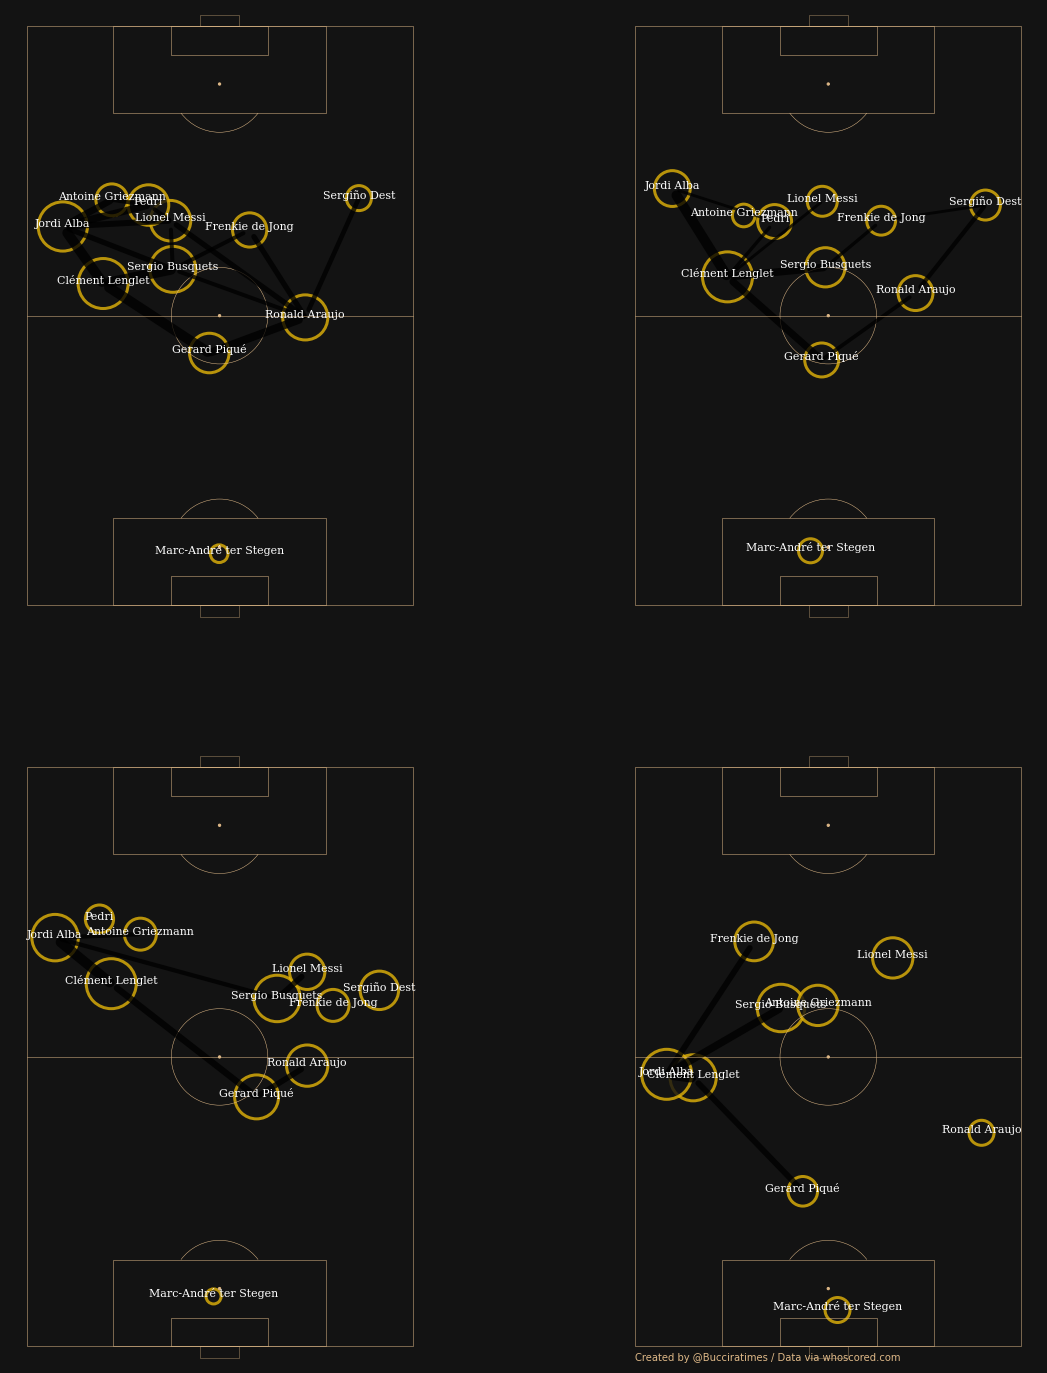

In [12]:
def plot_node(idx, data):
    x = 'x_median'
    end_x = 'x_median_end'
    y = 'y_median'
    end_y = 'y_median_end'
    
    pitch.scatter(
        data['x_median'] /
        100 * 120,
        80 - data['y_median'] / 100 * 80,
        s=data['marker_size']*2.5, 
    #     hatch='|'*2,
        alpha=0.8,
        facecolor='#131313',
        edgecolor='#E3B409',
        linewidth=3,
        ax=axes[idx],
    )

    for index, row in data.iterrows():
        pitch.annotate(row['passRecipientName'],
                    xy=(row['x_median'] / 100 * 120, 80-row['y_median'] / 100 * 80),
                    c='white',
                    va='baseline',
                    ha='center',
    #                    size=20,
                    size=11,
    #                    weight=700,
                    weight=500,
                    fontname='serif',
                    ax=axes[idx],
                    )
    
def plot_line(idx,data):
    for i, row in data.iterrows():
        pass_line_template_shrink(
            axes[idx],i,
            row['x_median'],row['y_median'],
            row['x_median_end'],row['y_median_end'],
            '#000000')

#     pitch.annotate(
#         "These Positions are Median Location of Successful Passes.\nArrows -> Pass Work Until First Substitution\nNode's Size -> Counts of Passes",
#         (110, 40),
#         color='gold',
#         fontsize=14, ha='center', va='center', fontname='monospace',
#         ax=axes[idx], fontweight='bold')


def pass_line_template(ax, x, y, end_x, end_y, line_color, width):
    ax.annotate('', xy=(80-.8*end_y, 1.2*end_x), xytext=(80-.8*y, 1.2*x), zorder=1,
    arrowprops=dict(arrowstyle='-', linewidth=width, color=line_color, alpha=.78))
    
def pass_line_template_shrink(ax, idx, x, y, end_x, end_y, line_color, dist_delta=1.2):
    dist = math.hypot(end_x - x, end_y - y)
    angle = math.atan2(end_y-y, end_x-x)
    upd_x = x + (dist - dist_delta) * math.cos(angle)
    upd_y = y + (dist - dist_delta) * math.sin(angle)
    width = passes_between['width'][idx]
    pass_line_template(ax, x, y, upd_x, upd_y, line_color=line_color, width=width)
    
    
fig, axes = plt.subplots(2,2,figsize=(20,25),facecolor='#131313')
axes = axes.ravel()

pitch = VerticalPitch(
    pitch_type='statsbomb',
    goal_type = 'box',
    pitch_color = '#131313',
    line_color = '#DEB887', 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5,
    half=False
)
pitch.draw(ax=axes[0])
pitch.draw(ax=axes[1])
pitch.draw(ax=axes[2])
pitch.draw(ax=axes[3])


divide = 22.5
for i in range(4):

    passes_df = match_events_df.loc[[
        row['displayName']=='Pass' for row in list(match_events_df['type'])
    ]].reset_index(drop=True)

    if i == 0:
        passes_df = passes_df[(passes_df['minute']<=divide)]
        passes_df = passes_df[passes_df['teamId']==TEAMID].reset_index().drop('index', axis=1)
        passes_df = passes_df.loc[[
                row['displayName']=='Successful' for row in list(
                passes_df['outcomeType']
            )]].reset_index(drop=True)

        
        passes_df['playerName'] = [team_players_dict[i] for i in list(passes_df['playerId'])]
        passes_df['passRecipientId'] = passes_df['playerId'].shift(-1)
        passes_df['passRecipientName'] = passes_df['playerName'].shift(-1)
        passes_df.dropna(subset=['passRecipientName'],inplace=True)


        match_player_df = pd.DataFrame()
        player_names = []
        player_ids = []
        player_pos = []
        player_kit_number = []

        for player in matches_df[VENUE][matchId]['players']:
            player_names.append(player['name'])
            player_ids.append(player['playerId'])
            player_pos.append(player['position'])
            player_kit_number.append(player['shirtNo'])

        match_player_df['playerId'] = player_ids
        match_player_df['playerName']=player_names
        match_player_df['playerPos']=player_pos
        match_player_df['playerKitNumber']=player_kit_number


        passes_df = passes_df.merge(
            match_player_df,
            on=['playerId', 'playerName'],
            how='left',
            validate='m:1'
        )
        match_player_df.rename(columns={
            'playerId': 'passRecipientId', 'playerName': 'passRecipientName'  
            },inplace=True)
        passes_df = passes_df.merge(
            match_player_df,
            on=['passRecipientId', 'passRecipientName'],
            how='left',
            validate='m:1',
            suffixes=['', '_Receipt']
        )



        # passes_df.drop(['playerPos_x','playerKitNumber_x','playerPos_y','playerKitNumber_y'],inplace=True,axis=1)

        passes_df = passes_df[(passes_df['playerPos'] != 'Sub')]

        # passes_df = passes_df[(passes_df['playerPos'] != 'Sub')|(passes_df['playerKitNumber']==27)|(passes_df['playerKitNumber']==9)]
        # passes_df = passes_df[passes_df['playerKitNumber']!=16]


        passes_formation = passes_df[[
                'id', 'playerKitNumber', 'playerKitNumber_Receipt']].copy()

        location_formation = passes_df[['playerKitNumber', 'x', 'y']].copy()

        # average_locs_and_count = location_formation.groupby('playerKitNumber').agg(
        #     {'x':['mean', 'median'], 'y':['mean', 'median', 'count']}
        # )

        average_locs_and_count = location_formation.groupby(by='playerKitNumber').agg(
            {'x':['mean','median'], 'y':['mean','median','count']}
        )
        average_locs_and_count.columns = ['x_mean', 'x_median', 'y_mean', 'y_median', 'count']


        passes_formation['kitNo_max'] = passes_formation[[
            'playerKitNumber', 'playerKitNumber_Receipt'
        ]].max(axis='columns')

        passes_formation['kitNo_min'] = passes_formation[[
                'playerKitNumber', 'playerKitNumber_Receipt'
        ]].min(axis='columns')


        passes_between = passes_formation.groupby(
            ['kitNo_max', 'kitNo_min']
        )['id'].count().reset_index()

        passes_between.rename(columns={'id': 'pass_count'},inplace=True)

        passes_between = passes_between.merge(
            average_locs_and_count,
            left_on='kitNo_min',
            right_index=True
        )

        passes_between = passes_between.merge(
            average_locs_and_count,
            left_on='kitNo_max',
            right_index=True,
            suffixes=['','_end']
        )


        MAXLINEWIDTH = 10
        MAXMARKERSIZE = 1000
        COLORCODE = '#87CEEB'
        MINTRANSPARENCY = 0.3

        passes_between['width'] = passes_between['pass_count'] / \
            passes_between['pass_count'].max() * MAXLINEWIDTH

        passes_between = passes_between.loc[(passes_between['pass_count']>5)]

        average_locs_and_count['marker_size'] = (
            average_locs_and_count['count'] / average_locs_and_count['count'].max() * MAXMARKERSIZE
        )


        color = np.array(to_rgba(COLORCODE))
        color = np.tile(color, (len(passes_between), 1))
        c_transparency = passes_between['pass_count'] / passes_between['pass_count'].max()
        c_transparency = (c_transparency * (1 - MINTRANSPARENCY)) + MINTRANSPARENCY
        color[:,3] = c_transparency
        passes_between['alpha'] = color.tolist()



        passes_between.reset_index(drop=True,inplace=True)

        average_locs_and_count['name'] = average_locs_and_count.index
        average_locs_and_count = average_locs_and_count.merge(match_player_df,on=['playerKitNumber'])

        plot_node(idx=i,data=average_locs_and_count)
        plot_line(idx=i,data=passes_between)



    elif i == 1:
        passes_df = passes_df[(passes_df['minute']>divide)&(passes_df['minute']<=divide*2)]

        passes_df = passes_df[passes_df['teamId']==TEAMID].reset_index().drop('index', axis=1)
        passes_df = passes_df.loc[[
                row['displayName']=='Successful' for row in list(
                passes_df['outcomeType']
            )]].reset_index(drop=True)

        
        passes_df['playerName'] = [team_players_dict[i] for i in list(passes_df['playerId'])]
        passes_df['passRecipientId'] = passes_df['playerId'].shift(-1)
        passes_df['passRecipientName'] = passes_df['playerName'].shift(-1)
        passes_df.dropna(subset=['passRecipientName'],inplace=True)


        match_player_df = pd.DataFrame()
        player_names = []
        player_ids = []
        player_pos = []
        player_kit_number = []

        for player in matches_df[VENUE][matchId]['players']:
            player_names.append(player['name'])
            player_ids.append(player['playerId'])
            player_pos.append(player['position'])
            player_kit_number.append(player['shirtNo'])

        match_player_df['playerId'] = player_ids
        match_player_df['playerName']=player_names
        match_player_df['playerPos']=player_pos
        match_player_df['playerKitNumber']=player_kit_number


        passes_df = passes_df.merge(
            match_player_df,
            on=['playerId', 'playerName'],
            how='left',
            validate='m:1'
        )
        match_player_df.rename(columns={
            'playerId': 'passRecipientId', 'playerName': 'passRecipientName'  
            },inplace=True)
        passes_df = passes_df.merge(
            match_player_df,
            on=['passRecipientId', 'passRecipientName'],
            how='left',
            validate='m:1',
            suffixes=['', '_Receipt']
        )



        # passes_df.drop(['playerPos_x','playerKitNumber_x','playerPos_y','playerKitNumber_y'],inplace=True,axis=1)

        passes_df = passes_df[(passes_df['playerPos'] != 'Sub')]

        # passes_df = passes_df[(passes_df['playerPos'] != 'Sub')|(passes_df['playerKitNumber']==27)|(passes_df['playerKitNumber']==9)]
        # passes_df = passes_df[passes_df['playerKitNumber']!=16]


        passes_formation = passes_df[[
                'id', 'playerKitNumber', 'playerKitNumber_Receipt']].copy()

        location_formation = passes_df[['playerKitNumber', 'x', 'y']].copy()

        # average_locs_and_count = location_formation.groupby('playerKitNumber').agg(
        #     {'x':['mean', 'median'], 'y':['mean', 'median', 'count']}
        # )

        average_locs_and_count = location_formation.groupby(by='playerKitNumber').agg(
            {'x':['mean','median'], 'y':['mean','median','count']}
        )
        average_locs_and_count.columns = ['x_mean', 'x_median', 'y_mean', 'y_median', 'count']


        passes_formation['kitNo_max'] = passes_formation[[
            'playerKitNumber', 'playerKitNumber_Receipt'
        ]].max(axis='columns')

        passes_formation['kitNo_min'] = passes_formation[[
                'playerKitNumber', 'playerKitNumber_Receipt'
        ]].min(axis='columns')


        passes_between = passes_formation.groupby(
            ['kitNo_max', 'kitNo_min']
        )['id'].count().reset_index()

        passes_between.rename(columns={'id': 'pass_count'},inplace=True)

        passes_between = passes_between.merge(
            average_locs_and_count,
            left_on='kitNo_min',
            right_index=True
        )

        passes_between = passes_between.merge(
            average_locs_and_count,
            left_on='kitNo_max',
            right_index=True,
            suffixes=['','_end']
        )


        MAXLINEWIDTH = 10
        MAXMARKERSIZE = 1000
        COLORCODE = '#87CEEB'
        MINTRANSPARENCY = 0.3

        passes_between['width'] = passes_between['pass_count'] / \
            passes_between['pass_count'].max() * MAXLINEWIDTH

        passes_between = passes_between.loc[(passes_between['pass_count']>5)]

        average_locs_and_count['marker_size'] = (
            average_locs_and_count['count'] / average_locs_and_count['count'].max() * MAXMARKERSIZE
        )


        color = np.array(to_rgba(COLORCODE))
        color = np.tile(color, (len(passes_between), 1))
        c_transparency = passes_between['pass_count'] / passes_between['pass_count'].max()
        c_transparency = (c_transparency * (1 - MINTRANSPARENCY)) + MINTRANSPARENCY
        color[:,3] = c_transparency
        passes_between['alpha'] = color.tolist()



        passes_between.reset_index(drop=True,inplace=True)

        average_locs_and_count['name'] = average_locs_and_count.index
        average_locs_and_count = average_locs_and_count.merge(match_player_df,on=['playerKitNumber'])

        plot_node(idx=i,data=average_locs_and_count)
        plot_line(idx=i,data=passes_between)



    elif i == 2:
        passes_df = passes_df[(passes_df['minute']>divide*2)&(passes_df['minute']<=divide*3)]
        passes_df = passes_df[passes_df['teamId']==TEAMID].reset_index().drop('index', axis=1)
        passes_df = passes_df.loc[[
                row['displayName']=='Successful' for row in list(
                passes_df['outcomeType']
            )]].reset_index(drop=True)

        
        passes_df['playerName'] = [team_players_dict[i] for i in list(passes_df['playerId'])]
        passes_df['passRecipientId'] = passes_df['playerId'].shift(-1)
        passes_df['passRecipientName'] = passes_df['playerName'].shift(-1)
        passes_df.dropna(subset=['passRecipientName'],inplace=True)


        match_player_df = pd.DataFrame()
        player_names = []
        player_ids = []
        player_pos = []
        player_kit_number = []

        for player in matches_df[VENUE][matchId]['players']:
            player_names.append(player['name'])
            player_ids.append(player['playerId'])
            player_pos.append(player['position'])
            player_kit_number.append(player['shirtNo'])

        match_player_df['playerId'] = player_ids
        match_player_df['playerName']=player_names
        match_player_df['playerPos']=player_pos
        match_player_df['playerKitNumber']=player_kit_number


        passes_df = passes_df.merge(
            match_player_df,
            on=['playerId', 'playerName'],
            how='left',
            validate='m:1'
        )
        match_player_df.rename(columns={
            'playerId': 'passRecipientId', 'playerName': 'passRecipientName'  
            },inplace=True)
        passes_df = passes_df.merge(
            match_player_df,
            on=['passRecipientId', 'passRecipientName'],
            how='left',
            validate='m:1',
            suffixes=['', '_Receipt']
        )



        # passes_df.drop(['playerPos_x','playerKitNumber_x','playerPos_y','playerKitNumber_y'],inplace=True,axis=1)

        passes_df = passes_df[(passes_df['playerPos'] != 'Sub')]

        # passes_df = passes_df[(passes_df['playerPos'] != 'Sub')|(passes_df['playerKitNumber']==27)|(passes_df['playerKitNumber']==9)]
        # passes_df = passes_df[passes_df['playerKitNumber']!=16]


        passes_formation = passes_df[[
                'id', 'playerKitNumber', 'playerKitNumber_Receipt']].copy()

        location_formation = passes_df[['playerKitNumber', 'x', 'y']].copy()

        # average_locs_and_count = location_formation.groupby('playerKitNumber').agg(
        #     {'x':['mean', 'median'], 'y':['mean', 'median', 'count']}
        # )

        average_locs_and_count = location_formation.groupby(by='playerKitNumber').agg(
            {'x':['mean','median'], 'y':['mean','median','count']}
        )
        average_locs_and_count.columns = ['x_mean', 'x_median', 'y_mean', 'y_median', 'count']


        passes_formation['kitNo_max'] = passes_formation[[
            'playerKitNumber', 'playerKitNumber_Receipt'
        ]].max(axis='columns')

        passes_formation['kitNo_min'] = passes_formation[[
                'playerKitNumber', 'playerKitNumber_Receipt'
        ]].min(axis='columns')


        passes_between = passes_formation.groupby(
            ['kitNo_max', 'kitNo_min']
        )['id'].count().reset_index()

        passes_between.rename(columns={'id': 'pass_count'},inplace=True)

        passes_between = passes_between.merge(
            average_locs_and_count,
            left_on='kitNo_min',
            right_index=True
        )

        passes_between = passes_between.merge(
            average_locs_and_count,
            left_on='kitNo_max',
            right_index=True,
            suffixes=['','_end']
        )


        MAXLINEWIDTH = 10
        MAXMARKERSIZE = 1000
        COLORCODE = '#87CEEB'
        MINTRANSPARENCY = 0.3

        passes_between['width'] = passes_between['pass_count'] / \
            passes_between['pass_count'].max() * MAXLINEWIDTH

        passes_between = passes_between.loc[(passes_between['pass_count']>5)]

        average_locs_and_count['marker_size'] = (
            average_locs_and_count['count'] / average_locs_and_count['count'].max() * MAXMARKERSIZE
        )


        color = np.array(to_rgba(COLORCODE))
        color = np.tile(color, (len(passes_between), 1))
        c_transparency = passes_between['pass_count'] / passes_between['pass_count'].max()
        c_transparency = (c_transparency * (1 - MINTRANSPARENCY)) + MINTRANSPARENCY
        color[:,3] = c_transparency
        passes_between['alpha'] = color.tolist()



        passes_between.reset_index(drop=True,inplace=True)

        average_locs_and_count['name'] = average_locs_and_count.index
        average_locs_and_count = average_locs_and_count.merge(match_player_df,on=['playerKitNumber'])

        plot_node(idx=i,data=average_locs_and_count)
        plot_line(idx=i,data=passes_between)



    elif i == 3:
        passes_df = passes_df[(passes_df['minute']>divide*3)&(passes_df['minute']<=divide*4)]
        passes_df = passes_df[passes_df['teamId']==TEAMID].reset_index().drop('index', axis=1)
        passes_df = passes_df.loc[[
                row['displayName']=='Successful' for row in list(
                passes_df['outcomeType']
            )]].reset_index(drop=True)

        
        passes_df['playerName'] = [team_players_dict[i] for i in list(passes_df['playerId'])]
        passes_df['passRecipientId'] = passes_df['playerId'].shift(-1)
        passes_df['passRecipientName'] = passes_df['playerName'].shift(-1)
        passes_df.dropna(subset=['passRecipientName'],inplace=True)


        match_player_df = pd.DataFrame()
        player_names = []
        player_ids = []
        player_pos = []
        player_kit_number = []

        for player in matches_df[VENUE][matchId]['players']:
            player_names.append(player['name'])
            player_ids.append(player['playerId'])
            player_pos.append(player['position'])
            player_kit_number.append(player['shirtNo'])

        match_player_df['playerId'] = player_ids
        match_player_df['playerName']=player_names
        match_player_df['playerPos']=player_pos
        match_player_df['playerKitNumber']=player_kit_number


        passes_df = passes_df.merge(
            match_player_df,
            on=['playerId', 'playerName'],
            how='left',
            validate='m:1'
        )
        match_player_df.rename(columns={
            'playerId': 'passRecipientId', 'playerName': 'passRecipientName'  
            },inplace=True)
        passes_df = passes_df.merge(
            match_player_df,
            on=['passRecipientId', 'passRecipientName'],
            how='left',
            validate='m:1',
            suffixes=['', '_Receipt']
        )



        # passes_df.drop(['playerPos_x','playerKitNumber_x','playerPos_y','playerKitNumber_y'],inplace=True,axis=1)

        passes_df = passes_df[(passes_df['playerPos'] != 'Sub')]

        # passes_df = passes_df[(passes_df['playerPos'] != 'Sub')|(passes_df['playerKitNumber']==27)|(passes_df['playerKitNumber']==9)]
        # passes_df = passes_df[passes_df['playerKitNumber']!=16]


        passes_formation = passes_df[[
                'id', 'playerKitNumber', 'playerKitNumber_Receipt']].copy()

        location_formation = passes_df[['playerKitNumber', 'x', 'y']].copy()

        # average_locs_and_count = location_formation.groupby('playerKitNumber').agg(
        #     {'x':['mean', 'median'], 'y':['mean', 'median', 'count']}
        # )

        average_locs_and_count = location_formation.groupby(by='playerKitNumber').agg(
            {'x':['mean','median'], 'y':['mean','median','count']}
        )
        average_locs_and_count.columns = ['x_mean', 'x_median', 'y_mean', 'y_median', 'count']


        passes_formation['kitNo_max'] = passes_formation[[
            'playerKitNumber', 'playerKitNumber_Receipt'
        ]].max(axis='columns')

        passes_formation['kitNo_min'] = passes_formation[[
                'playerKitNumber', 'playerKitNumber_Receipt'
        ]].min(axis='columns')


        passes_between = passes_formation.groupby(
            ['kitNo_max', 'kitNo_min']
        )['id'].count().reset_index()

        passes_between.rename(columns={'id': 'pass_count'},inplace=True)

        passes_between = passes_between.merge(
            average_locs_and_count,
            left_on='kitNo_min',
            right_index=True
        )

        passes_between = passes_between.merge(
            average_locs_and_count,
            left_on='kitNo_max',
            right_index=True,
            suffixes=['','_end']
        )


        MAXLINEWIDTH = 10
        MAXMARKERSIZE = 1000
        COLORCODE = '#87CEEB'
        MINTRANSPARENCY = 0.3

        passes_between['width'] = passes_between['pass_count'] / \
            passes_between['pass_count'].max() * MAXLINEWIDTH

        passes_between = passes_between.loc[(passes_between['pass_count']>5)]

        average_locs_and_count['marker_size'] = (
            average_locs_and_count['count'] / average_locs_and_count['count'].max() * MAXMARKERSIZE
        )


        color = np.array(to_rgba(COLORCODE))
        color = np.tile(color, (len(passes_between), 1))
        c_transparency = passes_between['pass_count'] / passes_between['pass_count'].max()
        c_transparency = (c_transparency * (1 - MINTRANSPARENCY)) + MINTRANSPARENCY
        color[:,3] = c_transparency
        passes_between['alpha'] = color.tolist()



        passes_between.reset_index(drop=True,inplace=True)

        average_locs_and_count['name'] = average_locs_and_count.index
        average_locs_and_count = average_locs_and_count.merge(match_player_df,on=['playerKitNumber'])

        plot_node(idx=i,data=average_locs_and_count)
        plot_line(idx=i,data=passes_between)






axes[3].text(x=0,y=-3,s='Created by @Bucciratimes / Data via whoscored.com',color='#DEB887')

plt.savefig('/work/output/barcelona/passnet2.png', 
            dpi=500, bbox_inches="tight",facecolor='#131313')

,Unnamed: 0,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,...,relatedEventId,relatedPlayerId,goalMouthZ,goalMouthY,isShot,blockedX,blockedY,cardType.value,cardType.displayName,isGoal


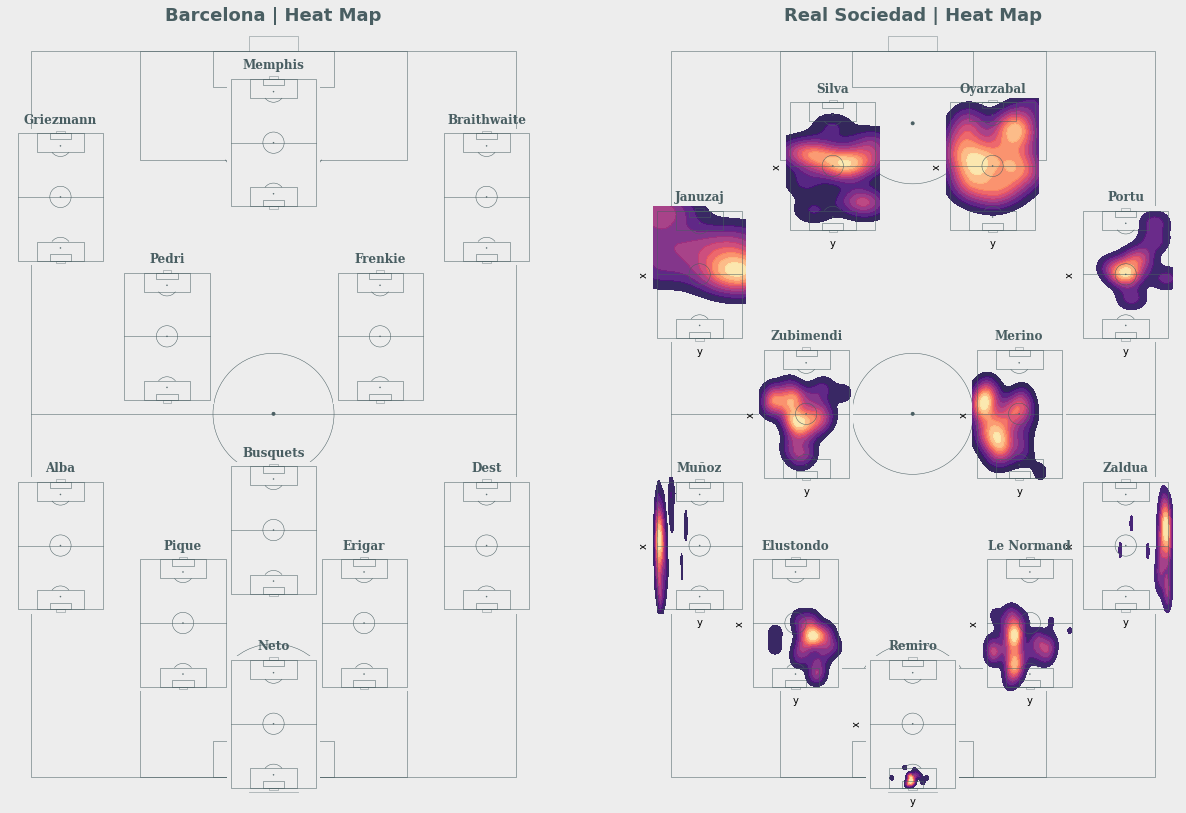

In [39]:
fig, axes = plt.subplots(1,2,figsize=(21,18))
fig.set_facecolor(pitchColor)
pitch = VerticalPitch(
    pitch_type='statsbomb',
    goal_type = 'box',
    pitch_color = pitchColor,
    line_color = '#495E62', 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5
)
pitch.draw(ax=axes[0])
pitch.draw(ax=axes[1])


# image = Image.open('/work/assets/image/barcelona_small2.png')
# alpha = Image.new("L", image.size, 70)
# ax_image = fig.add_axes((0.25, 0.45, 0.1, 0.1))
# ax_image.axis('off')
# image.putalpha(alpha)
# ax_image.imshow(image)

# image = Image.open(f'/work/assets/image/granada.png')
# alpha = Image.new("L", image.size, 70)
# ax_image = fig.add_axes((0.674, 0.463, 0.1, 0.1))
# ax_image.axis('off')
# image.putalpha(alpha)
# ax_image.imshow(image)

def plot_inset(axes, pdf, x, y, name):
    pos = inset_axes(axes,width=1.3,height=2.8,loc=10,bbox_to_anchor=(x,y),bbox_transform=axes.transAxes,borderpad=0.0) 
    pos.set_title(name,color='#495E62',fontweight='bold',fontsize=12,fontname='serif')
    kde = sns.kdeplot(
        pdf['y'],
        pdf['x'],
        shade=True,
        shade_lowest=False,
        alpha=.9,
        n_lavels=10,
        cmap='magma',
        ax=pos
    ) 
    pitch.draw(ax=pos)
    pos.invert_xaxis()
    return pos

def plotHeatmap(targetDf, tId,teamName,axesNum,location):
    df = targetDf
    df = df[df['teamId']==tId]
    passesdf = df[df['type.value']==1]
    passesdf['playerId'] = passesdf['playerId'].astype('int')

    df = passesdf
    df = df.reset_index()

    df['x']=df['x']*1.2
    df['endX']=df['endX']*1.2
    df['y']=df['y']*0.8
    df['endY']=df['endY']*0.8
    
    for (player_id,player_name), (x,y) in location.items():
        player_df = df[df['playerId']==player_id]
        plot_inset(axes=axes[axesNum], pdf=player_df, x=x, y=y, name=player_name)

        axes[axesNum].set_title(f"{teamName} | Heat Map",color='#495E62',fontsize=18,fontweight='bold')

plotHeatmap(targetDf,teamId,teamName,0,positions['433']['Barcelona'])
plotHeatmap(targetDf,opponentId,opponentName,1,positions['442']['Real Sociedad'])
# plt.savefig(f'/work/output/report/{teamName}-{opponentName}_heat.png', bbox_inches='tight', transparent=True, dpi=200, facecolor='#131313')

plt.show()


In [35]:
positions['433']['Barcelona']

{(76202, 'Neto'): (0.5, 0.1),
 (379205, 'Dest'): (0.9, 0.33),
 (44288, 'Alba'): (0.1, 0.33),
 (12712, 'Pique'): (0.33, 0.23),
 (368091, 'Erigar'): (0.67, 0.23),
 (279423, 'Busquets'): (0.5, 0.35),
 (44721, 'Frenkie'): (0.7, 0.6),
 (110154, 'Memphis'): (0.5, 0.85),
 (402197, 'Pedri'): (0.3, 0.6),
 (73494, 'Braithwaite'): (0.9, 0.78),
 (80241, 'Griezmann'): (0.1, 0.78)}

In [106]:
df = targetDf.query('574 < index <= 581')
df['type.displayName']

575            Pass
576       BallTouch
577            Pass
578            Pass
579           Error
580    BallRecovery
581            Goal
Name: type.displayName, dtype: object

In [1]:
targetTeam = 'real'
targetYear = '2021'
df = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#0.csv')
df1 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#1.csv')
df2 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#2.csv')
df3 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#3.csv')
df4 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#4.csv')
df5 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#5.csv')
df6 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#6.csv')
df7 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#7.csv')
df8 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#8.csv')
df9 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#9.csv')
df10 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#10.csv')
df11 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#11.csv')
df12 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#12.csv')
df13 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#13.csv')
df14 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#14.csv')
df15 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#15.csv')
df16 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#16.csv')
df17 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#17.csv')
df18 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#18.csv')
df19 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#19.csv')
df20 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#20.csv')
df21 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#21.csv')
df22 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#22.csv')
df23 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#23.csv')
df24 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#24.csv')
df25 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#25.csv')
df26 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#26.csv')
df27 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#27.csv')
df28 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#28.csv')
df29 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#29.csv')
df30 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#30.csv')
# df31 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#31.csv')
# df32 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#32.csv')
# df33 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#33.csv')
# df34 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#34.csv')
# df35 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#35.csv')
# df36 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#36.csv')
# df37 = pd.read_csv(f'/work/assets/whoscored/{targetTeam}/match/{targetYear}/{targetYear}#37.csv')



all_gw = [
    df,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,
    df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df28,df29,df30,
    df31,df32,
#     df33,df34,df35,df36,df37
]

df = pd.concat(all_gw)
df = df[df['teamId']==52]

#Filtering Shots
df = df[((df['type.displayName']=="Goal") | (df['type.displayName']=="MissedShots") |
        (df['type.displayName']=="SavedShot") | (df['type.displayName']=="ShotOnPost"))]

df['x'] = df['x'] * 1.2
df['y'] = df['y'] * .8


fig, axes = plt.subplots(2,3,figsize=(20,10),facecolor='#131313')
axes = axes.ravel()

pitch = VerticalPitch(
    pitch_type='statsbomb',
    goal_type = 'box',
    pitch_color = '#131313',
    line_color = '#DEB887', 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5,
    half=True
)
pitch.draw(ax=axes[0])
pitch.draw(ax=axes[1])
pitch.draw(ax=axes[2])
pitch.draw(ax=axes[3])
pitch.draw(ax=axes[4])
pitch.draw(ax=axes[5])

axes[0].invert_xaxis()
axes[1].invert_xaxis()
axes[2].invert_xaxis()
axes[3].invert_xaxis()
axes[4].invert_xaxis()
axes[5].invert_xaxis()


colors1 = ['#DCB7F9', '#B05CF1', '#9F38EE', '#8213D6']
n_bins = 50
cmap_name = 'my_list'
cm1 = LinearSegmentedColormap.from_list('my_list', colors1, N=n_bins)

playerIds = {
#     11119:'Messi',
#     22221:'Suarez',
#     50835:'Neymar',
#     9486:'Iniesta',
#     80241:'Griezmann',
#     382234:'Ansu Fati',
#     80767:'Coutinho',
#     299513:'Dembele',
#     368409:'Trincão',
#     73494:'M.Braithwaite',
#     374869:"Carles Pérez",
#     22732:'Rakitic',
#     95953:'Paco',
#     25008:'Vidal',
#     36399:'Paulinho',
#     146780:'Malcom',
#     303268:'Alena',
#     68585:'L.Dejong',
#     115587:'Ocampos',
#     323547:'En-Nesyri',
#     102439:'Vázquez',
#     303729:'Acuna',
#     22546:'Papu',
#     362431:'Felix',
#     127604:'Ángel Correa',
#     254582:'Llorente',
#     132962:'Lemar',
#     115472:'Carrasco',
#     140090:'Dembele',
    14296:'Benzema',
    347862:'Rodrygo',
    337782:'Vinícius',
    31772:'Kroos',
    88526:'Casemiro',
    20874:'Modric'
    
}

for idx,(keyid,name) in enumerate(playerIds.items()):
    bdf = df[df['playerId']==keyid]
    shots = len(bdf)
    goals = len(bdf[bdf['isGoal']==True])
    per = round((goals / shots) * 100, 2)
    x = bdf['x']
    y = bdf['y'] 
    h = pitch.hexbin(x,y, ax=axes[idx], cmap=cm1, alpha=0.7, linewidth=1,
                     gridsize=(12,12), linewidths=0, mincnt=1, edgecolors='#D68213',
                     hatch='',vmin=0, vmax=6)
    counts = h.get_array()
    verts = h.get_offsets()

    for i in range(len(counts)):
        pitch.annotate(int(counts[i]), xy=(verts[i][1], verts[i][0]),ha="center",va="center",
                       size=16,ax=axes[idx],zorder=3,color='gold',fontname='serif')


    axes[idx].set_title(name, fontsize=18, color="#DEB887",fontname='serif')
    axes[idx].text(s=f'Goal:{goals} | Shoot:{shots}\n     ->  {per}%',x=57,y=72,fontsize=15,color="#DEB887",fontname='serif')


plt.text(222,220,f"{targetTeam}'s Player Shot Locations in Laliga{targetYear}", fontsize=22, alpha=.7, color='gold',fontname='serif')
plt.text(290,50,"Data via Whoscored / Inspired by @jonollington Created by @Bucciratimes", color='#FFF8F8', fontsize=8, alpha=0.5)

# plt.savefig(f'/work/output/report/{targetTeam}{targetYear}_loc.png', bbox_inches='tight', transparent=True, dpi=500, facecolor='#131313')

NameError: name 'pd' is not defined

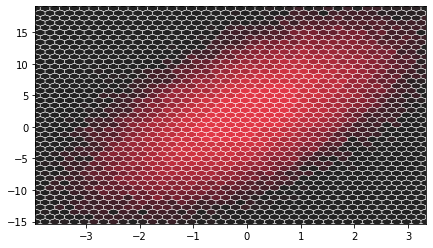

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
np.random.seed(0)
n = 100000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
fig, ax = plt.subplots(figsize=(7, 4))
cmap = colors.ListedColormap(["#222222", "#2A2224", "#3A2027", "#421F28", "#54202B", "#65202E", "#782231",
                              "#892433", "#9B2838", "#AC2B3A", "#BE2F3E", "#CF3341", "#E13746"])
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap=cmap, ec='white', lw=0.5)
ax.margins(x=-0.1, y=-0.1)
plt.show()


In [40]:
def createPVFormationMap(match_data, events_df, team, color_palette,
                        markerstyle, markersize, markeredgewidth, labelsize, labelcolor, ax):
    
    # getting team id and venue
    if match_data['home']['name'] == team:
        teamId = match_data['home']['teamId']
        venue = 'home'
    else:
        teamId = match_data['away']['teamId']
        venue = 'away'


    # getting opponent   
    if venue == 'home':
        opponent = match_data['away']['name']
    else:
        opponent = match_data['home']['name']


    # getting player dictionary
    team_players_dict = {}
    for player in match_data[venue]['players']:
        team_players_dict[player['playerId']] = player['name']


    # getting minute of first substitution
    for i,row in events_df.iterrows():
        if row['type'] == 'SubstitutionOn' and row['teamId'] == teamId:
            sub_minute = str(row['minute'])
            break


    # getting players dataframe
    match_players_df = pd.DataFrame()
    player_names = []
    player_ids = []
    player_pos = []
    player_kit_number = []

    for player in match_data[venue]['players']:
        player_names.append(player['name'])
        player_ids.append(player['playerId'])
        player_pos.append(player['position'])
        player_kit_number.append(player['shirtNo'])

    match_players_df['playerId'] = player_ids
    match_players_df['playerName'] = player_names
    match_players_df['playerPos'] = player_pos
    match_players_df['playerKitNumber'] = player_kit_number


    # extracting passes
    passes_df = events_df.loc[events_df['teamId'] == teamId].reset_index().drop('index', axis=1)
    passes_df['playerId'] = passes_df['playerId'].astype('float').astype('Int64')
    if 'playerName' in passes_df.columns:
        passes_df = passes_df.drop(columns='playerName')
    passes_df.dropna(subset=["playerId"], inplace=True)
    passes_df.insert(27, column='playerName', value=[team_players_dict[i] for i in list(passes_df['playerId'])])
    if 'passRecipientId' in passes_df.columns:
        passes_df = passes_df.drop(columns='passRecipientId')
        passes_df = passes_df.drop(columns='passRecipientName')
    passes_df.insert(28, column='passRecipientId', value=passes_df['playerId'].shift(-1))  
    passes_df.insert(29, column='passRecipientName', value=passes_df['playerName'].shift(-1))  
    passes_df.dropna(subset=["passRecipientName"], inplace=True)
    passes_df = passes_df.loc[events_df['type'] == 'Pass', :].reset_index(drop=True)
    passes_df = passes_df.loc[events_df['outcomeType'] == 'Successful', :].reset_index(drop=True)
    index_names = passes_df.loc[passes_df['playerName']==passes_df['passRecipientName']].index
    passes_df.drop(index_names, inplace=True)
    passes_df = passes_df.merge(match_players_df, on=['playerId', 'playerName'], how='left', validate='m:1')
    passes_df = passes_df.merge(match_players_df.rename({'playerId': 'passRecipientId', 'playerName':'passRecipientName'},
                                                        axis='columns'), on=['passRecipientId', 'passRecipientName'],
                                                        how='left', validate='m:1', suffixes=['', 'Receipt'])
    # passes_df = passes_df[passes_df['playerPos'] != 'Sub']
    
    
    # Getting net possesion value for passes
    netPVPassed = passes_df.groupby(['playerId', 'playerName'])['EPV'].sum().reset_index()
    netPVReceived = passes_df.groupby(['passRecipientId', 'passRecipientName'])['EPV'].sum().reset_index()
    

    
    # Getting formation and player ids for first 11
    formation = match_data[venue]['formations'][0]['formationName']
    formation_positions = match_data[venue]['formations'][0]['formationPositions']
    playerIds = match_data[venue]['formations'][0]['playerIds'][:11]

    
    # Getting all data in a dataframe
    formation_data = []
    for playerId, pos in zip(playerIds, formation_positions):
        pl_dict = {'playerId': playerId}
        pl_dict.update(pos)
        formation_data.append(pl_dict)
    formation_data = pd.DataFrame(formation_data)
    formation_data['vertical'] = normalize(formation_data['vertical'], 
                                           {'actual': {'lower': 0, 'upper': 10}, 'desired': {'lower': 10, 'upper': 110}})
    formation_data['horizontal'] = normalize(formation_data['horizontal'],
                                             {'actual': {'lower': 0, 'upper': 10}, 'desired': {'lower': 80, 'upper': 0}})
    formation_data = netPVPassed.join(formation_data.set_index('playerId'), on='playerId', how='inner').reset_index(drop=True)
    formation_data = formation_data.rename(columns={"EPV": "PV"})


    # Plotting
    pitch = Pitch(pitch_type='statsbomb', pitch_color='#171717', line_color='#5c5c5c',
                  goal_type='box')
    pitch.draw(ax=ax, constrained_layout=True, tight_layout=True)
    
    sns.scatterplot(x='vertical', y='horizontal', data=formation_data, hue='PV', s=markersize, marker=markerstyle, legend=False, 
                    palette=color_palette, linewidth=markeredgewidth, ax=ax)
    
    ax.text(2, 78, '{}'.format('-'.join(formation)), size=20, c='grey')
    
    for index, row in formation_data.iterrows():
        pitch.annotate(str(round(row.PV*100,2))+'%', xy=(row.vertical, row.horizontal), c=labelcolor, va='center',
                       ha='center', size=labelsize, zorder=2, weight='bold', ax=ax)
        pitch.annotate(row.playerName, xy=(row.vertical, row.horizontal+5), c=labelcolor, va='center',
                       ha='center', size=labelsize, zorder=2, weight='bold', ax=ax)
        
        

KeyError: 'Column not found: EPV'

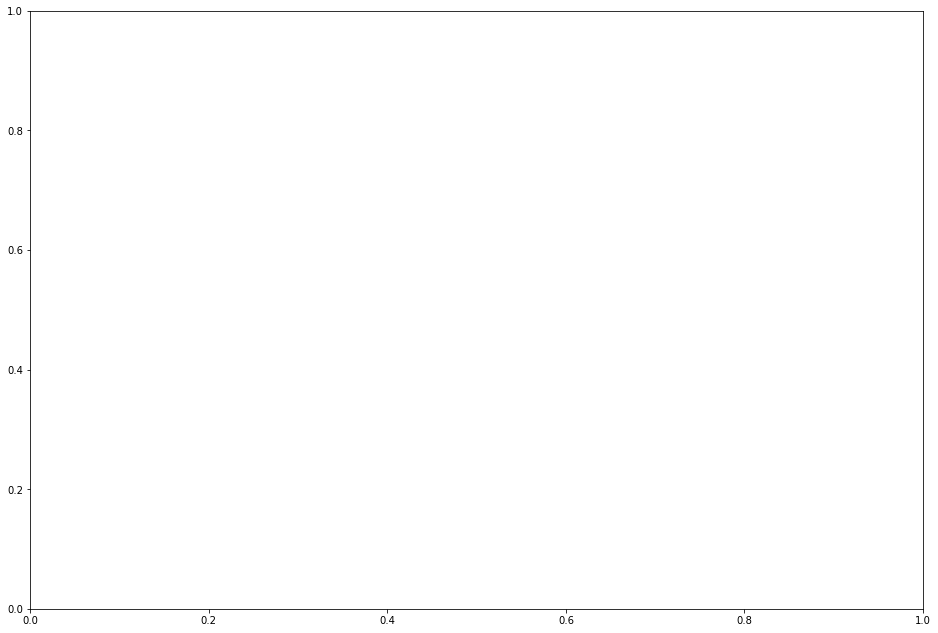

In [42]:
fig,ax = plt.subplots(figsize=(16,11))
createPVFormationMap(match_data, events_df, team='Barcelona', color_palette="nipy_spectral_r",
                             markerstyle='8', markersize=2000, markeredgewidth=2, labelsize=7, labelcolor='w', ax=ax)
